In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Importing data

In [96]:
cancer = pd.read_csv('../data/breast-cancer-wisconsin-data.csv')

In [97]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [98]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Response variable = 'Diagnosis'

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Looking for missing values

In [99]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [100]:
cancer.drop(columns=['Unnamed: 32'], inplace=True)

In [101]:
cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Looking for multicollinearity

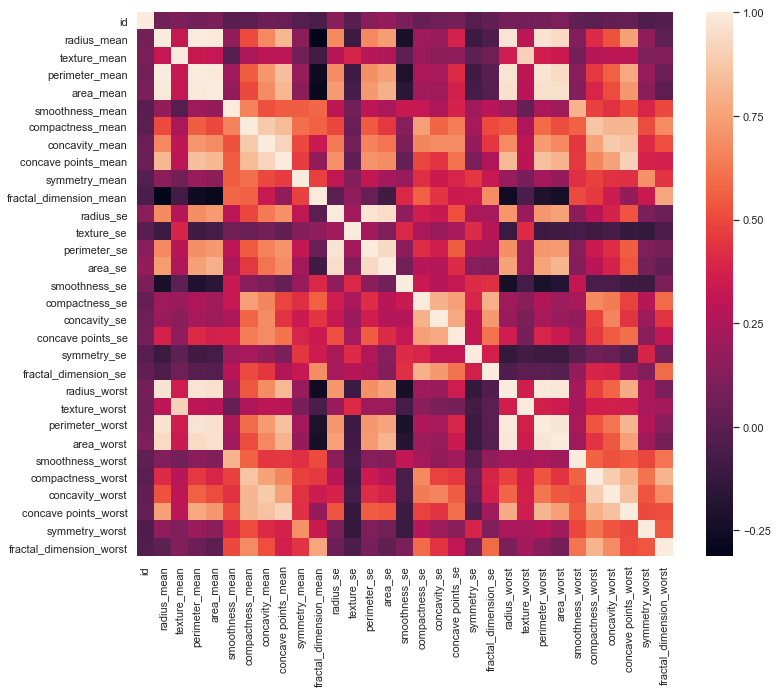

In [102]:
rcParams['figure.figsize'] = 12, 10
corr = cancer.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [103]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

### Response variable : 'diagnosis'

In [104]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [105]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Splitting data to training (80%) and testing sets (20%)

In [176]:

y = cancer['diagnosis']
X = cancer[[col for col in cancer.columns if col != 'diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [107]:
print(X_train.shape)
print(y_train.shape)

(455, 31)
(455,)


In [108]:
print(X_test.shape)
print(y_test.shape)

(114, 31)
(114,)


## Random Forest classification (higher performance)

In [131]:

cancer_rf = RandomForestClassifier()
cancer_rf.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
y_pred_test_rf = cancer_rf.predict(X_test)

### Confusion matrix

In [111]:
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_test_rf))


Confusion matrix: 
 [[71  1]
 [ 2 40]]


In [112]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_test_rf))


Accuracy score:  0.9736842105263158


### Response variable data is not binary ('M' or 'B'). When malignous, 1. If benign, 0.

In [168]:
cancer['diagnosis_binary'] = np.where(cancer['diagnosis']== 'M', 1, 0)
cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [141]:
cancer['diagnosis_binary'].unique()

array([1, 0])

In [177]:

y = cancer['diagnosis_binary']
X = cancer[[col for col in cancer.columns if (col != 'diagnosis_binary') & (col != 'diagnosis')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [145]:

cancer_binary_rf = RandomForestClassifier()
cancer_binary_rf.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Implementing ROC curve, now that response variable is binary 

AUC : 0.9974882260596546


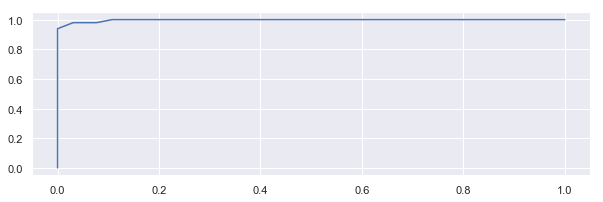

In [210]:
rcParams['figure.figsize'] = 10, 3


y_pred_proba_rf = cancer_binary_rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr_rf,tpr_rf)
print('AUC :', auc)

In [149]:
y_pred_test_rf = cancer_binary_rf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_test_rf))


Accuracy score:  0.9210526315789473


In [150]:
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_test_rf))


Confusion matrix: 
 [[73  1]
 [ 8 32]]


In [156]:
print('balanced_accuracy_score testing set', balanced_accuracy_score(y_test, y_pred_test_rf))


balanced_accuracy_score testing set 0.8932432432432433


In [157]:

print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_rf, average=None))


Precision score:  [0.90123457 0.96969697]
Recall score : [0.98648649 0.8       ]
F1 score : [0.94193548 0.87671233]


### Logistic Regression (less performant)

In [164]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)
logreg_model.score(X_train, y_train)

y_pred_test_logreg = logreg_model.predict(X_test)


/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [165]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_test_logreg))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_test_logreg))

Accuracy score:  0.8947368421052632
Confusion matrix: 
 [[69  5]
 [ 7 33]]


In [167]:
print('balanced_accuracy_score testing set', balanced_accuracy_score(y_test, y_pred_test_logreg))


balanced_accuracy_score testing set 0.8787162162162162


In [166]:
print('Precision score: ', precision_score(y_test, y_pred_test_logreg, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_logreg, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_logreg, average=None))


Precision score:  [0.90789474 0.86842105]
Recall score : [0.93243243 0.825     ]
F1 score : [0.92       0.84615385]


AUC : 0.9745682888540032


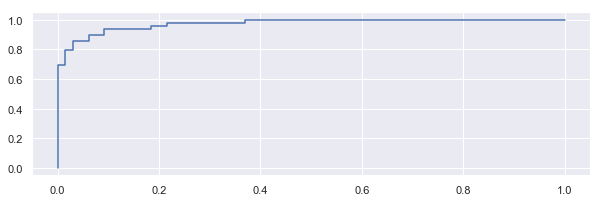

In [211]:

y_pred_proba_logreg = logreg_model.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg)
auc = metrics.roc_auc_score(y_test, y_pred_proba_logreg)

plt.plot(fpr_logreg,tpr_logreg)
print('AUC :', auc)

In [173]:
# AUC, F1 scores and accuracy are lower than scores with Random Forest

### K-Neighbors (less performant)

Number of neighbors:  1
Accuracy score:  0.8070175438596491
balanced_accuracy_score:  0.7880690737833596
Precision score:  [0.77922078 0.86486486]
Recall score : [0.92307692 0.65306122]
F1 score : [0.84507042 0.74418605]
AUC : 0.7880690737833596
Confusion matrix: 
 [[60  5]
 [17 32]] 

Number of neighbors:  3
Accuracy score:  0.7368421052631579
balanced_accuracy_score:  0.7089481946624804
Precision score:  [0.71084337 0.80645161]
Recall score : [0.90769231 0.51020408]
F1 score : [0.7972973 0.625    ]
AUC : 0.756828885400314
Confusion matrix: 
 [[59  6]
 [24 25]] 

Number of neighbors:  5
Accuracy score:  0.7017543859649122
balanced_accuracy_score:  0.6656200941915228
Precision score:  [0.6741573 0.8      ]
Recall score : [0.92307692 0.40816327]
F1 score : [0.77922078 0.54054054]
AUC : 0.7653061224489797
Confusion matrix: 
 [[60  5]
 [29 20]] 

Number of neighbors:  7
Accuracy score:  0.6842105263157895
balanced_accuracy_score:  0.6401883830455259
Precision score:  [0.65263158 0.8421052

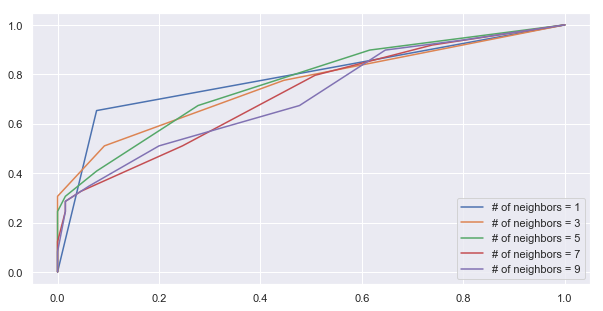

In [195]:
# initialize and fit the model

rcParams['figure.figsize'] = 10, 5

for neighbors in range(1,11,2):
    neighbor_model = KNeighborsClassifier(n_neighbors=neighbors)
    neighbor_model.fit(X_train, y_train) 
    KNeighborsClassifier()

    y_pred_test_kn = neighbor_model.predict(X_test)

    print('Number of neighbors: ', neighbors)
    print('Accuracy score: ', accuracy_score(y_test, y_pred_test_kn))
    print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_kn))

    print('Precision score: ', precision_score(y_test, y_pred_test_kn, average=None))
    print('Recall score :', recall_score(y_test, y_pred_test_kn, average=None))
    print('F1 score :', f1_score(y_test, y_pred_test_kn, average=None))

    
    y_pred_proba_kn = neighbor_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_kn)
    auc = metrics.roc_auc_score(y_test, y_pred_proba_kn)

    plt.plot(fpr,tpr)
    plt.gca().legend((['# of neighbors = ' + str(neighbors) for neighbors in range(1,11,2)]))
    print('AUC :', auc)
    
    
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_test_kn), '\n')
    
    

Accuracy score:  0.7368421052631579
Confusion matrix: 
 [[59  6]
 [24 25]]


### Gradient Boosting

Confusion matrix 
 [[64  1]
 [ 6 43]] 

Accuracy score 0.9385964912280702
balanced_accuracy_score:  0.6427001569858712 

Precision score:  [0.65591398 0.80952381]
Recall score : [0.93846154 0.34693878]
F1 score : [0.7721519  0.48571429] 

AUC : 0.9910518053375197


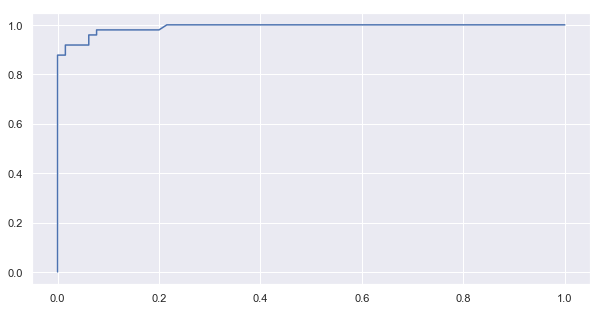

In [206]:

# Your code here:
cancer_GB = GradientBoostingClassifier()

cancer_GB.fit(X_train, y_train)
y_pred_test_gb = cancer_GB.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gb))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_kn), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_kn, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_kn, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_kn, average=None), '\n')


y_pred_proba_gb = cancer_GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_gb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_gb)
print('AUC :', auc)
plt.plot(fpr,tpr)


### Gaussian Naive Bayes


Confusion matrix 
 [[63  2]
 [47  2]] 

Accuracy score 0.5701754385964912
balanced_accuracy_score:  0.5050235478806907 

Precision score:  [0.57272727 0.5       ]
Recall score : [0.96923077 0.04081633]
F1 score : [0.72      0.0754717] 

AUC : 0.8681318681318682


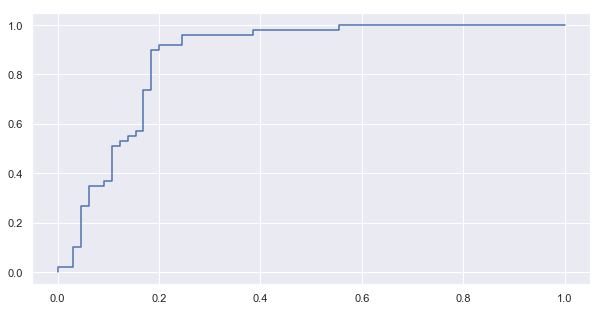

In [208]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)


y_pred_test_gnb = gnb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gnb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gnb))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gnb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_gnb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gnb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gnb, average=None), '\n')


y_pred_proba_gnb = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_gnb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_gnb)
print('AUC :', auc)
plt.plot(fpr,tpr)


### RBF SVM

Confusion matrix 
 [[65  0]
 [49  0]] 

Accuracy score 0.5701754385964912
balanced_accuracy_score:  0.5 

Precision score:  [0.57017544 0.        ]
Recall score : [1. 0.]
F1 score : [0.72625698 0.        ] 

AUC : 0.8681318681318682


/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


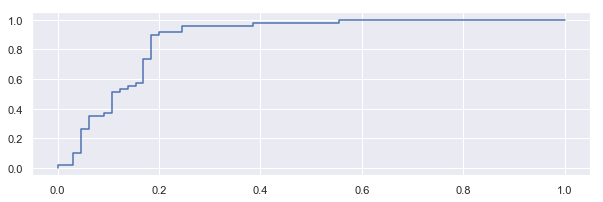

In [216]:
SVM = SVC(gamma=2, C=1)
y_pred = SVM.fit(X_train, y_train)


y_pred_test_SVM = SVM.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_SVM), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_SVM))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_SVM), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_SVM, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_SVM, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_SVM, average=None), '\n')


y_pred_proba_SVM = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_SVM)
auc = metrics.roc_auc_score(y_test, y_pred_proba_SVM)
print('AUC :', auc)
plt.plot(fpr,tpr)
